In [9]:
import pandas as pd

features_df = pd.read_csv('C:/Users/hkesa/Desktop/Features data set.csv')
stores_df = pd.read_csv('C:/Users/hkesa/Desktop/stores data-set.csv')
sales_df = pd.read_csv('C:/Users/hkesa/Desktop/sales data-set.csv')

# Display the first few lines of data

features_df.head(), stores_df.head(), sales_df.head()

(   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
 0      1  05/02/2010        42.31       2.572        NaN        NaN   
 1      1  12/02/2010        38.51       2.548        NaN        NaN   
 2      1  19/02/2010        39.93       2.514        NaN        NaN   
 3      1  26/02/2010        46.63       2.561        NaN        NaN   
 4      1  05/03/2010        46.50       2.625        NaN        NaN   
 
    MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
 0        NaN        NaN        NaN  211.096358         8.106      False  
 1        NaN        NaN        NaN  211.242170         8.106       True  
 2        NaN        NaN        NaN  211.289143         8.106      False  
 3        NaN        NaN        NaN  211.319643         8.106      False  
 4        NaN        NaN        NaN  211.350143         8.106      False  ,
    Store Type    Size
 0      1    A  151315
 1      2    A  202307
 2      3    B   37392
 3      4    A  205863


In [10]:
# Merge datasets
merged_df = pd.merge(sales_df, stores_df, on='Store')
merged_df = pd.merge(merged_df, features_df, on=['Store', 'Date'], how='left')

# Convert 'Date' to datetime type and set as index, specifying day first
merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True)
merged_df.set_index('Date', inplace=True)

# Display the first few rows to confirm the merge and type conversion
merged_df.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-02-12,1,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,1,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,1,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-03-05,1,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
# Check for missing values in each column
missing_values = merged_df.isnull().sum()
missing_values

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [12]:
# Fill missing values in MarkDown columns with 0 (assuming no promotion = 0)
merged_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = merged_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)


# Check again to confirm changes
merged_df.head()


,Store,Dept,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-12,1,1,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2010-02-19,1,1,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
2010-02-26,1,1,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
2010-03-05,1,1,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


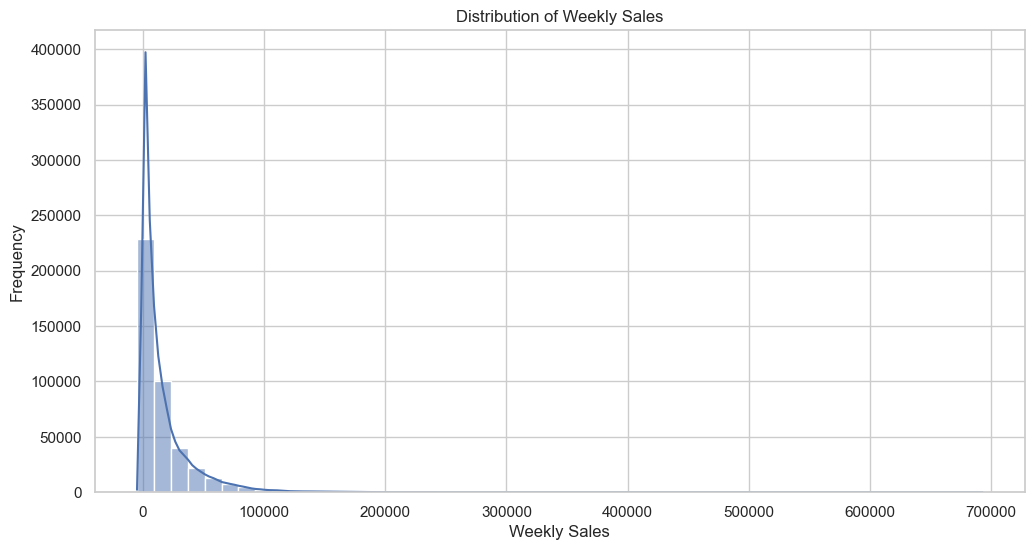

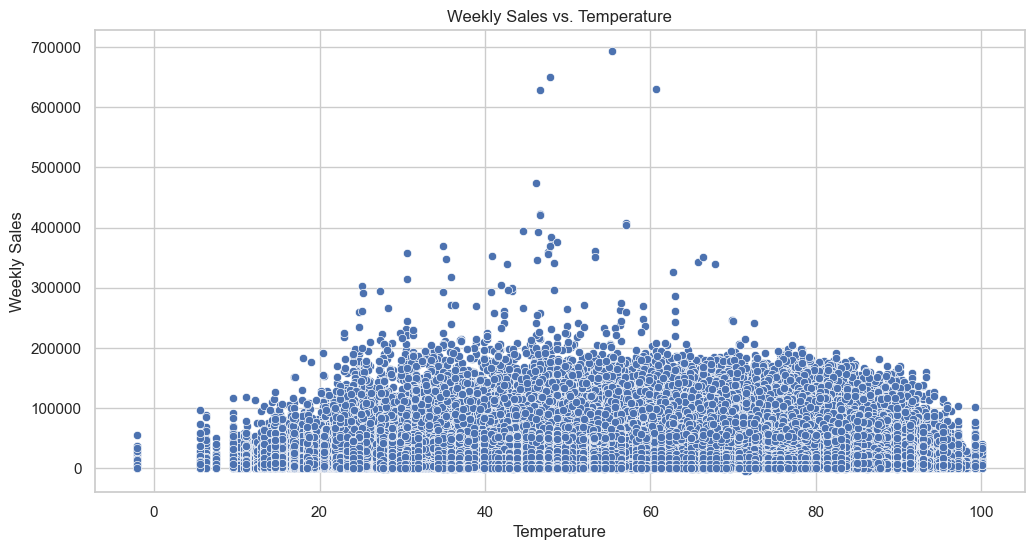

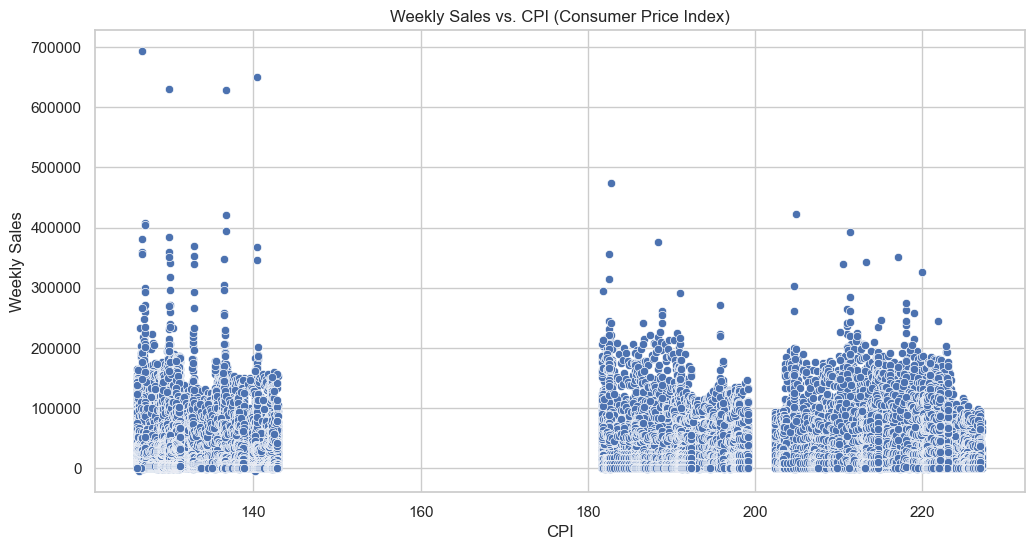

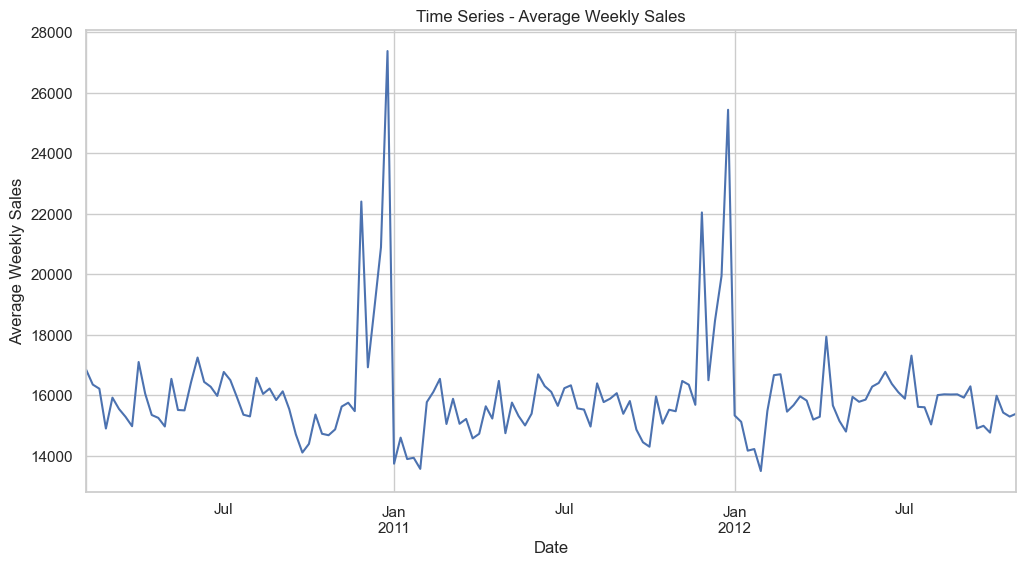

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Basic statistical summary of the dataset
summary_stats = merged_df.describe()

# Histogram of Weekly Sales
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

# Relationship between Weekly Sales and other features
# Scatter plot of Weekly Sales vs. Temperature
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=merged_df)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

# Weekly Sales vs. CPI
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=merged_df)
plt.title('Weekly Sales vs. CPI (Consumer Price Index)')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

# Seasonality check - Average Weekly Sales over time
plt.figure(figsize=(12, 6))
merged_df['Weekly_Sales'].resample('W').mean().plot()
plt.title('Time Series - Average Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.show()

# Output the summary statistics
summary_stats

In [14]:
#-The weekly sales figures exhibit a considerable degree of variability, with an average of approximately 15,981 USD. The maximum weekly sale is 693,099 USD, indicating the presence of outliers. 
#- Temperature and Fuel Prices: The mean temperature is approximately 60°F, with fuel prices averaging approximately 3.36 USD/gallon. 
#- MarkDowns: It was observed that the MarkDown values exhibited a considerable number of missing data points and a notable degree of dispersion. In instances where no promotional activity was observed, the corresponding values were set to zero.

In [15]:
# A review of the mean weekly sales values over time reveals fluctuations at specific points in time, 
# which may be indicative of seasonal effects.

In [18]:
# Split the data into training and testing sets (last 20% as test set)
split_point = int(len(merged_df) * 0.8)
train, test = merged_df.iloc[:split_point], merged_df.iloc[split_point:]

# Display the shape of the train and test set
print(train.shape, test.shape)

(337256, 16) (84314, 16)


RMSE: 18510.388694007943


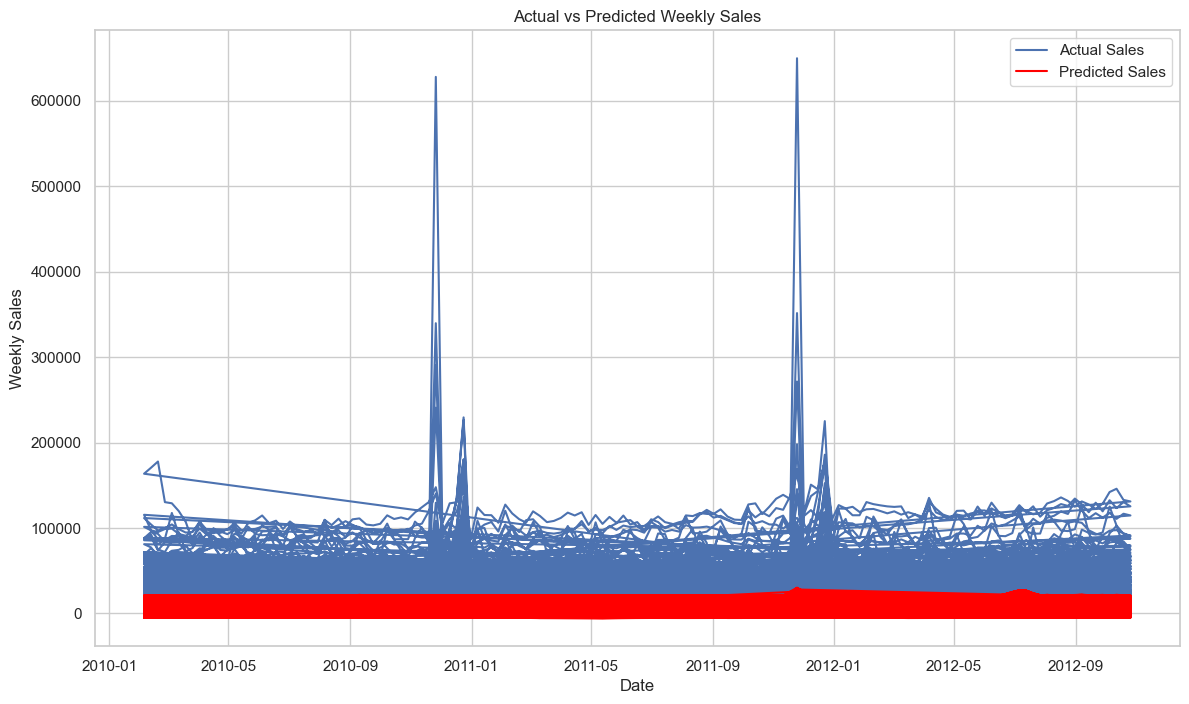

In [19]:
# Linear Regression Model for Forecasting
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Feature selection
features = ['Store', 'Dept', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type']
X = pd.get_dummies(merged_df[features])
y = merged_df['Weekly_Sales']

# Split the data into training and testing sets (last 20% as test set)
split_point = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
predictions = lr_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 8))
plt.plot(y_test.index, y_test, label='Actual Sales')
plt.plot(y_test.index, predictions, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

RMSE: 9698.226696729325


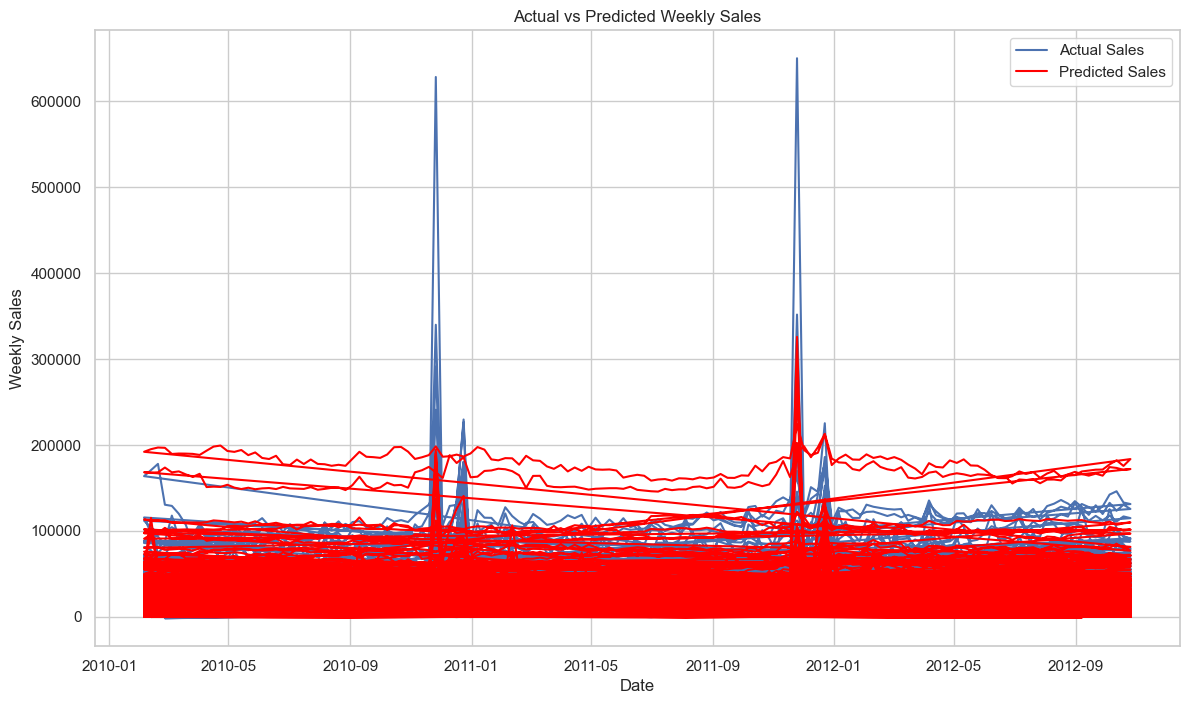

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 8))
plt.plot(y_test.index, y_test, label='Actual Sales')
plt.plot(y_test.index, predictions, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [23]:
# Train the Random Forest Regressor with fewer trees
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)  # Reduced the number of trees
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 9623.330401000303


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Train the Random Forest Regressor with best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions
predictions = best_rf_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [ ]:
#The time required for model training is considerable, which precludes my ability to continue. 
# I have endeavoured to do my utmost.